supply and demand analysis
calculate changes in oil reserves, including the SPR, weekly and compared to last year
determine if changes are in line with expectations
if not in line with expectations determine if it is do to higher demand, lower production, more exports or a combination

In [1]:
import pandas as pd
import USA_oil_data as oil
import prices
import FRED_oil_data as fred
import matplotlib.pyplot as plt

In [2]:
weekly_stocks = oil.weekly_stocks()
spr = oil.spr_reserves()

In [3]:
merged = pd.merge(weekly_stocks, spr, on='period')
merged.sort_index(inplace=True)

In [4]:
ticks = [x for x in range(0, 1400000, 200000)]

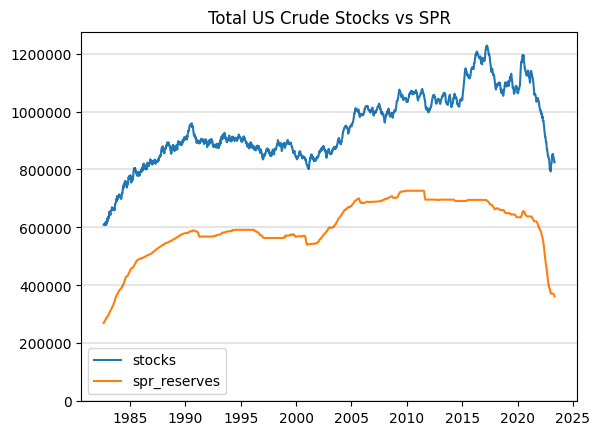

In [5]:
plt.plot(merged)

plt.yticks(ticks)
plt.ticklabel_format(axis='y', style='plain')
for t in ticks:
    plt.axhline(t, color='black', alpha=0.1)

plt.legend(merged.columns)
plt.title("Total US Crude Stocks vs SPR")
plt.show()

In [6]:
weekly_stocks = weekly_stocks.to_frame()

In [7]:
weekly_stocks['year'] = weekly_stocks.index.year
weekly_stocks['month'] = weekly_stocks.index.month
weekly_stocks = weekly_stocks[weekly_stocks['year'] > 2015]
monthly_average = weekly_stocks.groupby('month').mean()

In [8]:
grouped = weekly_stocks.groupby('year')

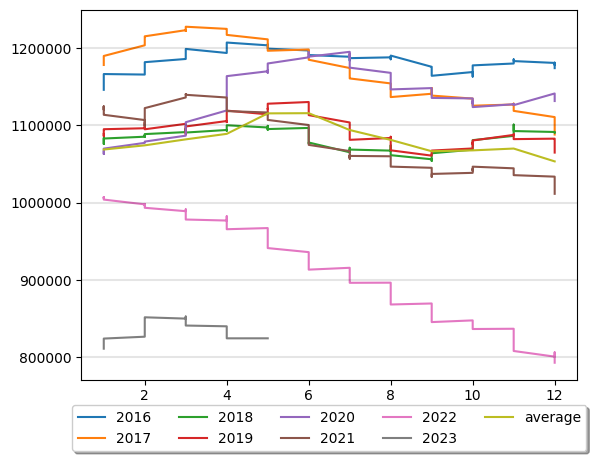

In [9]:
fig, ax = plt.subplots()

for name, group in grouped:
    ax.plot(group['month'], group['stocks'], label=name)
ax.plot(monthly_average.index, monthly_average['stocks'], label='average' )
plt.ticklabel_format(axis='y', style='plain')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
#add horizontal lines
ticks = [x for x in range(800000, 1300000, 100000)]
for t in ticks:
    plt.axhline(t, color='black', alpha=0.1)


plt.show()

In [51]:
weekly_stocks = oil.weekly_stocks()
weekly_stocks = weekly_stocks.to_frame()

weekly_stocks['year'] = weekly_stocks.index.year
weekly_stocks['month'] = weekly_stocks.index.month

weekly_stocks['diff'] = weekly_stocks['stocks'].diff(-1)
weekly_stocks = weekly_stocks[weekly_stocks['year'] > 2015]

week_info = weekly_stocks.index.isocalendar()
week_number = week_info['week']

merged_df = pd.merge(week_number, weekly_stocks, left_index=True, right_index=True)

In [53]:
grouped = merged_df.groupby('year')

In [59]:
for name, group in grouped:
    print(name)
    print(group[['stocks', 'week']])

2016
             stocks  week
period                   
2016-12-30  1174094    52
2016-12-23  1181145    51
2016-12-16  1180532    50
2016-12-09  1178277    49
2016-12-02  1180840    48
2016-11-25  1183230    47
2016-11-18  1184115    46
2016-11-11  1185371    45
2016-11-04  1180097    44
2016-10-28  1177666    43
2016-10-21  1163247    42
2016-10-14  1163800    41
2016-10-07  1169048    40
2016-09-30  1164199    39
2016-09-23  1167176    38
2016-09-16  1169058    37
2016-09-09  1175259    36
2016-09-02  1175818    35
2016-08-26  1190332    34
2016-08-19  1188057    33
2016-08-12  1185557    32
2016-08-05  1188065    31
2016-07-29  1187013    30
2016-07-22  1185600    29
2016-07-15  1183929    28
2016-07-08  1186272    27
2016-07-01  1188820    26
2016-06-24  1191045    25
2016-06-17  1195098    24
2016-06-10  1196015    23
2016-06-03  1196948    22
2016-05-27  1199311    21
2016-05-20  1200677    20
2016-05-13  1204904    19
2016-05-06  1203594    18
2016-04-29  1207203    17
2016-04

,week,stocks,year,month,diff
period,,,,,
2023-05-05,18,824598,2023,5,27.0
2023-04-28,17,824571,2023,4,-3285.0
2023-04-21,16,827856,2023,4,-6075.0
2023-04-14,15,833931,2023,4,-6193.0
2023-04-07,14,840124,2023,4,-1003.0
...,...,...,...,...,...
2016-01-29,4,1166461,2016,1,7791.0
2016-01-22,3,1158670,2016,1,8383.0
2016-01-15,2,1150287,2016,1,3978.0


In [11]:
imports, exports = oil.imports_exports()

In [12]:
imports_exports = pd.merge(imports, exports, on='period')

In [13]:
imports_exports['net'] = imports_exports['imports'] - imports_exports['exports']

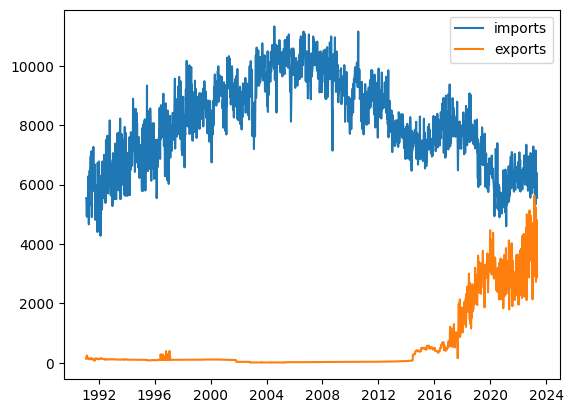

In [14]:
plt.plot(imports_exports[['imports', 'exports']])
plt.legend(imports_exports[['imports', 'exports']])